# 🤖 Modélisation - Détection de Fraude

**Objectif** : Entraîner et comparer plusieurs modèles de ML pour détecter les fraudes

**Approche** :
1. Preprocessing (SMOTE pour gérer le déséquilibre)
2. Baseline : Logistic Regression
3. Modèles avancés : Random Forest
4. Comparaison et sélection du meilleur modèle

**Note perso** : Le déséquilibre de classe est le vrai challenge ici. SMOTE va aider mais faut voir si les modèles arrivent à bien généraliser...

In [1]:
# Imports
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from preprocessing import FraudPreprocessor
from modeling import FraudDetector, compare_models

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Imports OK")

✅ Imports OK


## 1. Chargement et Preprocessing des données

On va utiliser le pipeline complet qu'on a créé dans `preprocessing.py`


In [2]:
# Charger les données
data_path = Path('../data/raw/creditcard.csv')
df = pd.read_csv(data_path)

print(f"📊 Dataset : {df.shape}")
print(f"Fraudes : {df['Class'].sum()} ({df['Class'].mean() * 100:.2f}%)")


📊 Dataset : (10000, 31)
Fraudes : 50.0 (0.50%)


In [3]:
# Preprocessing complet
preprocessor = FraudPreprocessor(random_state=42)
X_train, X_test, y_train, y_test = preprocessor.full_pipeline(df, test_size=0.2, use_smote=True)

# Sauvegarder le scaler pour la production
preprocessor.save_scaler('../models/scaler.pkl')


🔧 PIPELINE DE PREPROCESSING
✅ Features préparées : (10000, 30)
✅ Target : (10000,)

✅ Split effectué :
   Train : (8000, 30)
   Test  : (2000, 30)
   Fraudes train : 40 (0.50%)
   Fraudes test  : 10 (0.50%)
✅ Scaler fitted sur X_train

📊 Avant resampling :
   Classe 0 (Normal) : 7960
   Classe 1 (Fraude) : 40



📊 Après SMOTE :
   Classe 0 (Normal) : 7960
   Classe 1 (Fraude) : 7960
✅ Resampling terminé : (15920, 30)

✅ PREPROCESSING TERMINÉ
✅ Scaler sauvegardé : ../models/scaler.pkl


## 2. Modélisation et Comparaison

Testons plusieurs modèles et choisissons le meilleur


🔬 COMPARAISON DE MODÈLES

   Modèle : LOGISTIC
✅ Modèle initialisé : logistic

🔧 Entraînement du modèle logistic...
   Shape : (15920, 30)
✅ Entraînement terminé en 0.03s

📊 ÉVALUATION du modèle logistic

🎯 Métriques :
   Accuracy  : 0.7250
   Precision : 0.0037
   Recall    : 0.2000
   F1-Score  : 0.0072
   ROC-AUC   : 0.3674

📋 Classification Report :
              precision    recall  f1-score   support

      Normal       0.99      0.73      0.84      1990
      Fraude       0.00      0.20      0.01        10

    accuracy                           0.72      2000
   macro avg       0.50      0.46      0.42      2000
weighted avg       0.99      0.72      0.84      2000


🔢 Matrice de Confusion :
   TN=1448, FP=542
   FN=8, TP=2

   Modèle : RANDOM_FOREST
✅ Modèle initialisé : random_forest

🔧 Entraînement du modèle random_forest...
   Shape : (15920, 30)


✅ Entraînement terminé en 2.21s

📊 ÉVALUATION du modèle random_forest

🎯 Métriques :
   Accuracy  : 0.9895
   Precision : 0.0000
   Recall    : 0.0000
   F1-Score  : 0.0000
   ROC-AUC   : 0.8770

📋 Classification Report :
              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      1990
      Fraude       0.00      0.00      0.00        10

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000


🔢 Matrice de Confusion :
   TN=1979, FP=11
   FN=10, TP=0

📊 RÉSULTATS COMPARÉS
        Model  accuracy  precision  recall  f1_score  roc_auc  training_time
     logistic    0.7250   0.003676     0.2   0.00722 0.367387       0.034928
random_forest    0.9895   0.000000     0.0   0.00000 0.876985       2.206990

🏆 Meilleur modèle : LOGISTIC (F1-Score = 0.0072)

🏆 Meilleur modèle : LOGISTIC
✅ Modèle initialisé : logistic

🔧 Entraînement du modèle lo

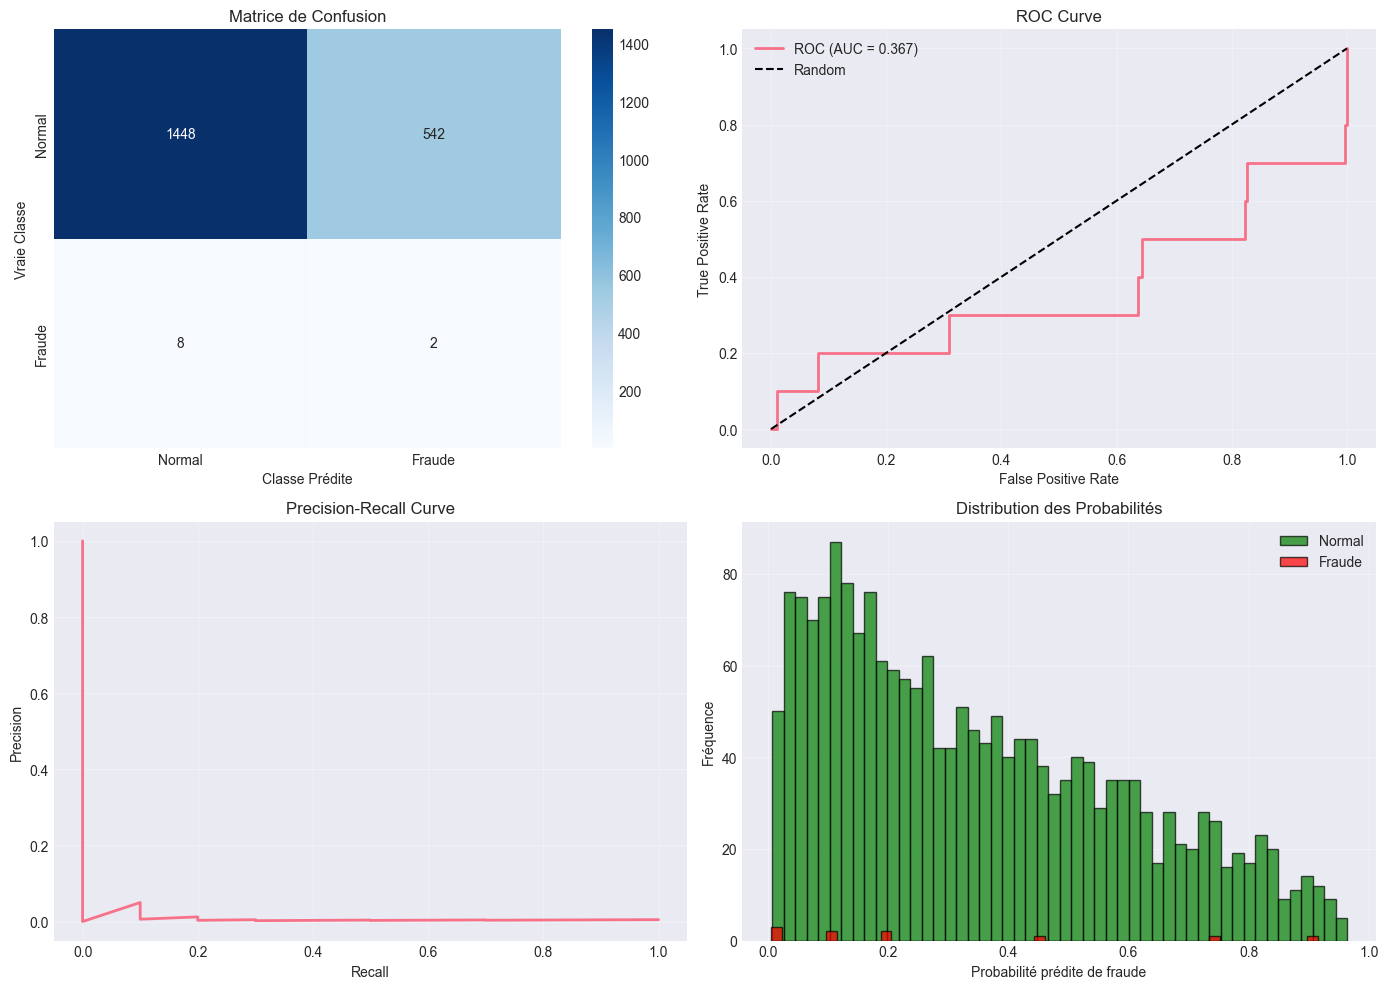

✅ Modèle sauvegardé : ../models/best_model_logistic.pkl

✅ Modèle sauvegardé et prêt pour la production !


In [4]:
# Comparer les modèles disponibles
results_df = compare_models(
    X_train, X_test, y_train, y_test,
    models_to_test=['logistic', 'random_forest']
)

# Sélectionner et sauvegarder le meilleur
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Meilleur modèle : {best_model_name.upper()}")

# Réentraîner et sauvegarder
best_detector = FraudDetector(model_type=best_model_name, random_state=42)
best_detector.train(X_train, y_train)
best_detector.evaluate(X_test, y_test, show_plots=True)
best_detector.save_model(f'../models/best_model_{best_model_name}.pkl')

print("\n✅ Modèle sauvegardé et prêt pour la production !")
